In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist 

In [3]:
#load mnist data sets
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [4]:
#train data set shape
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

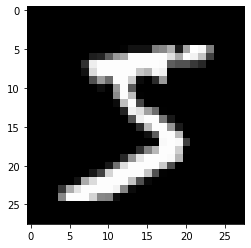

In [7]:
#pictures of the single image
plt.imshow(X=single_image, cmap='gray')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
#import 'to_categorical' for converting to label from continuous to categorical
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
#convert continuous train label to categorical label
y_categorical_train = to_categorical(y= y_train, num_classes=10)

In [15]:
#convert continuous test label to categorical label
y_categorical_test = to_categorical(y=y_test, num_classes=10)

In [16]:
x_train.max()

255

In [17]:
#normalize training data by divide to max value
x_train = x_train/255

In [18]:
#normalize test data by divide to max value
x_test = x_test/255

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
#reshape training data (batch_size, width, height, color_channels)
x_train = x_train.reshape(60000,28,28,1)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
#reshape test data (batch_size, width, height, color_channels)
x_test = x_test.reshape(10000,28,28,1)

In [23]:
#import model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [24]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), input_shape=(28,28,1), activation='relu')) #add CNN layer
model.add(MaxPooling2D(pool_size=(2,2))) #add Pooling layer

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax')) #Output Layer  activation='softmax' --> Multi Class        

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
#create early stop for best number of epachs
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [28]:
model.fit(x_train, y_categorical_train, epochs =50, validation_data = (x_test, y_categorical_test), callbacks = [early_stop]) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1352 - accuracy: 0.9590 - val_loss: 0.0636 - val_accuracy: 0.9797
Epoch 2/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0476 - accuracy: 0.9856 - val_loss: 0.0400 - val_accuracy: 0.9879
Epoch 3/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0394 - val_accuracy: 0.9878
Epoch 4/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0507 - val_accuracy: 0.9859
Epoch 5/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0528 - val_accuracy: 0.9844
Epoch 6/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.0376 - val_accuracy: 0.9892
Epoch 7/50
60000/60000 [==============================]

In [29]:
#create pandas DF with metrics data
metrics = pd.DataFrame(data=model.history.history)

In [30]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.135233,0.959050,0.063563,0.9797
1,0.047585,0.985633,0.040003,0.9879
2,0.031670,0.990167,0.039378,0.9878
3,0.020432,0.993350,0.050664,0.9859
4,0.014577,0.995200,0.052785,0.9844
5,0.011597,0.996117,0.037625,0.9892
6,0.008669,0.997200,0.044331,0.9883
7,0.005887,0.998050,0.053330,0.9872
8,0.005618,0.998100,0.046438,0.9891
9,0.005695,0.998117,0.063228,0.9864


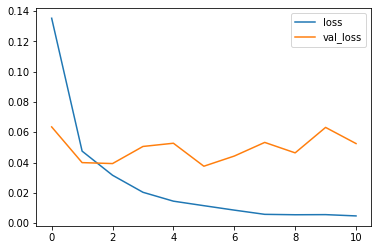

In [31]:
#plot loss and validatin loss
metrics[['loss', 'val_loss']].plot()

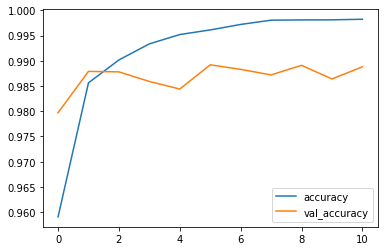

In [32]:
#plot accuracy and validatin accuracy
metrics[['accuracy', 'val_accuracy']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
#loss value & metrics values for the model in test mode
model.evaluate(x=x_test, y=y_categorical_test, verbose=0)

[0.05257306295237828, 0.9888]

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
#make predictions
predictions = model.predict_classes(x_test)

In [37]:
y_categorical_test.shape

(10000, 10)

In [38]:
print(y_test)

[7 2 1 ... 4 5 6]


In [39]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
print(confusion_matrix(y_true=y_test, y_pred=predictions))

[[ 975    1    1    1    0    0    1    0    1    0]
 [   0 1130    0    3    0    0    1    0    1    0]
 [   2    1 1022    1    0    0    0    4    2    0]
 [   0    1    3  997    0    5    0    1    2    1]
 [   0    0    1    0  967    0    5    0    0    9]
 [   1    0    0    7    0  882    1    0    1    0]
 [   4    2    0    0    1    1  949    0    1    0]
 [   0    2    7    0    0    0    0 1011    5    3]
 [   2    1    1    0    1    0    0    0  967    2]
 [   0    3    1    0    6    4    0    2    5  988]]


In [41]:
import seaborn as sns

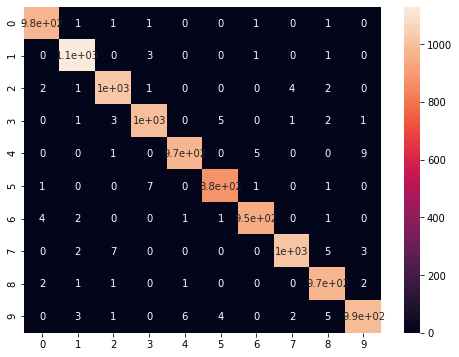

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True)

In [45]:
number = x_test[0]

In [46]:
number.shape

(28, 28, 1)

In [51]:
number = number.reshape(28,28)

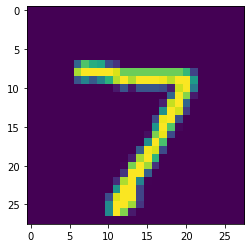

In [52]:
plt.imshow(number)

In [55]:
#reshape (number_images, width, height, color_channels)
model.predict_classes(x=number.reshape(1,28,28,1))

array([7], dtype=int64)

Text(0.5, 1.0, 'True label : 9 Prediction : 4')

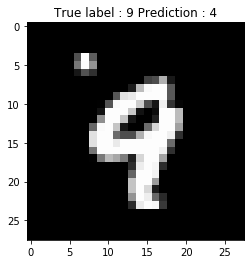

In [57]:
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label : {} Prediction : {}'.format(y_test[i],predictions[i]))